## **Carga de bibliotecas y datos**

In [1]:
# 1. Manipulación y Análisis de Datos
import pandas as pd
import numpy as np

# 2. Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilos para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño de figura por defecto

# 3. Machine Learning (Scikit-learn)

# 3.1. Preprocesamiento de Datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Escalado de características
# from sklearn.preprocessing import OneHotEncoder # Ya usamos pd.get_dummies, pero es una alternativa

# 3.2. Modelos de Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier # Otro modelo de boosting
# from xgboost import XGBClassifier # Si se instala XGBoost, descomentar
# from lightgbm import LGBMClassifier # Si se instala LightGBM, descomentar

# 3.3. Evaluación de Modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

# 3.4. Optimización de Hiperparámetros y Pipelines
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Optimización de hiperparámetros
from sklearn.pipeline import Pipeline # Para construir pipelines de preprocesamiento y modelado

# 4. Manejo del Desbalance de Clases (si es necesario)
from imblearn.over_sampling import SMOTE # Para sobremuestreo sintético (requiere pip install imbalanced-learn)
# from imblearn.pipeline import Pipeline as ImbPipeline # Si usas SMOTE en un pipeline (es diferente al de sklearn)

In [2]:
# Cargaremos nuestro dataFrame
try:
    df_telecom = pd.read_csv("./data/clientes_telecom_limpio.csv")
    print("Archivo 'clientes_telecom_limpio.csv' cargado exitosamente.")
    print("Las primeras 5 filas del DataFrame son:")
    print(df_telecom.head())
    print("\nInformación general del DataFrame:")
    print(df_telecom.info())
except FileNotFoundError:
    print("Error: El archivo 'clientes_telecom_limpio.csv' no se encontró. Asegúrate de que esté en el mismo directorio.")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Archivo 'clientes_telecom_limpio.csv' cargado exitosamente.
Las primeras 5 filas del DataFrame son:
   Cliente_ID Evasion  Genero  Mayor_Edad Tiene_Pareja Tiene_Dependientes  \
0  0002-Orfbo      No  Female           0          Yes                Yes   
1  0003-Mknfe      No    Male           0           No                 No   
2  0004-Tlhlj     Yes    Male           0           No                 No   
3  0011-Igkff     Yes    Male           1          Yes                 No   
4  0013-Exchz     Yes  Female           1          Yes                 No   

   Meses_Contrato Servicio_Telefonia MultiServicios Servicio_Internet  ...  \
0               9                Yes             No               Dsl  ...   
1               9                Yes            Yes               Dsl  ...   
2               4                Yes             No       Fiber Optic  ...   
3              13                Yes             No       Fiber Optic  ...   
4               3                Yes           

In [3]:
# Eliminar columnas que no aportan valor
columnasEliminadas = ['Cliente_ID'] 

# Verificar si las columnas existen antes de eliminarlas
columnas_existentes = [col for col in columnasEliminadas if col in df_telecom.columns]

if columnas_existentes:
    df_telecom = df_telecom.drop(columns=columnas_existentes)
    print(f"Columnas eliminadas exitosamente: {columnas_existentes}")
    print("\nLas primeras 5 filas del DataFrame después de eliminar columnas son:")
    print(df_telecom.head())
    print("\nInformación general del DataFrame después de eliminar columnas:")
    print(df_telecom.info())
else:
    print("No se encontraron las columnas especificadas para eliminar.")

Columnas eliminadas exitosamente: ['Cliente_ID']

Las primeras 5 filas del DataFrame después de eliminar columnas son:
  Evasion  Genero  Mayor_Edad Tiene_Pareja Tiene_Dependientes  Meses_Contrato  \
0      No  Female           0          Yes                Yes               9   
1      No    Male           0           No                 No               9   
2     Yes    Male           0           No                 No               4   
3     Yes    Male           1          Yes                 No              13   
4     Yes  Female           1          Yes                 No               3   

  Servicio_Telefonia MultiServicios Servicio_Internet Seguridad_Online  ...  \
0                Yes             No               Dsl               No  ...   
1                Yes            Yes               Dsl               No  ...   
2                Yes             No       Fiber Optic               No  ...   
3                Yes             No       Fiber Optic               No  ...   

In [4]:
# Seleccionar columnas de tipo 'object' (que suelen ser categóricas en pandas)
columnas_categoricas = df_telecom.select_dtypes(include=['object']).columns

# Excluir la columna 'Evasion' si es la variable objetivo y no necesita one-hot encoding
# Si 'Evasion' es la variable objetivo y ya está en 'Yes'/'No', la convertiremos a 0/1 después
if 'Evasion' in columnas_categoricas:
    columnas_categoricas = columnas_categoricas.drop('Evasion')
    # También convertimos 'Evasion' a binario (0 y 1) aquí para compatibilidad con modelos
    df_telecom['Evasion'] = df_telecom['Evasion'].map({'No': 0, 'Yes': 1})
    print("Columna 'Evasion' convertida a 0 y 1.")


print(f"Columnas categóricas a codificar: {list(columnas_categoricas)}")

# Aplicar One-Hot Encoding a las columnas categóricas seleccionadas
df_telecom_encoded = pd.get_dummies(df_telecom, columns=columnas_categoricas, dtype=int)


print("\nLas primeras 5 filas del DataFrame después de la codificación One-Hot son:")
print(df_telecom_encoded.head())

print("\nInformación general del DataFrame después de la codificación:")
print(df_telecom_encoded.info())

# Verificar que no queden columnas de tipo 'object' (excepto si hay alguna que se haya omitido intencionalmente)
print(f"\nColumnas restantes de tipo 'object': {df_telecom_encoded.select_dtypes(include=['object']).columns.tolist()}")

Columna 'Evasion' convertida a 0 y 1.
Columnas categóricas a codificar: ['Genero', 'Tiene_Pareja', 'Tiene_Dependientes', 'Servicio_Telefonia', 'MultiServicios', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato', 'Factura_Sin_Papel', 'Metodo_Pago']

Las primeras 5 filas del DataFrame después de la codificación One-Hot son:
   Evasion  Mayor_Edad  Meses_Contrato  Factura_Mensual  Total_Facturado  \
0        0           0               9             65.6           593.30   
1        0           0               9             59.9           542.40   
2        1           0               4             73.9           280.85   
3        1           1              13             98.0          1237.85   
4        1           1               3             83.9           267.40   

   Cuentas_Diarias  Genero_Female  Genero_Male  Tiene_Pareja_No  \
0         2.186667              1         

In [5]:
# Calcular la proporción de clientes que cancelaron vs. los que permanecieron activos
proporcion_evasion = df_telecom_encoded['Evasion'].value_counts()
porcentaje_evasion = df_telecom_encoded['Evasion'].value_counts(normalize=True) * 100

print("Conteo de clientes por estado de evasión (0: Activo, 1: Evasión):")
print(proporcion_evasion)

print("\nPorcentaje de clientes por estado de evasión:")
print(porcentaje_evasion)

# Evaluar si existe un desbalance
if porcentaje_evasion[1] < 30 and porcentaje_evasion[0] > 70: # Umbral común para considerar desbalance
    print("\n¡Advertencia! Se detecta un desbalance significativo en las clases (Evasión vs. Activos).")
    print("Esto deberá ser considerado durante el entrenamiento y evaluación de los modelos (ej. usando SMOTE, pesos de clase, o métricas como F1-score/AUC-ROC).")
else:
    print("\nLas clases parecen estar razonablemente balanceadas.")

Conteo de clientes por estado de evasión (0: Activo, 1: Evasión):
Evasion
0    5174
1    1869
Name: count, dtype: int64

Porcentaje de clientes por estado de evasión:
Evasion
0    73.463013
1    26.536987
Name: proportion, dtype: float64

¡Advertencia! Se detecta un desbalance significativo en las clases (Evasión vs. Activos).
Esto deberá ser considerado durante el entrenamiento y evaluación de los modelos (ej. usando SMOTE, pesos de clase, o métricas como F1-score/AUC-ROC).


In [6]:
# Separar características (X) y variable objetivo (y) de df_telecom_encoded

X = df_telecom_encoded.drop('Evasion', axis=1)
y = df_telecom_encoded['Evasion']

# Si hay NaNs, StandardScaler lanzará un error.
print("Número de valores nulos por columna antes de la estandarización (verificación):")
nans_in_X = X.isnull().sum()[X.isnull().sum() > 0]
if not nans_in_X.empty:
    print(nans_in_X)
    print("\n¡Advertencia! Se detectaron valores nulos en X. StandardScaler no puede manejarlos. Por favor, considera imputarlos o eliminarlos.")
else:
    print("No se encontraron valores nulos en X. ¡Perfecto para estandarizar!")

# -----------------------------------------------------------------------------------------


print("\nColumnas numéricas antes de la estandarización:")
print(X.select_dtypes(include=['number']).columns.tolist())


# Identificar columnas numéricas a estandarizar
# Las columnas resultantes de One-Hot Encoding (que son binarias 0/1) no necesitan estandarización.
# Solo las columnas que son verdaderamente continuas (o tienen más de 2 valores únicos) deben ser estandarizadas.

numeric_cols = X.select_dtypes(include=np.number).columns.tolist()

# Filtrar las columnas que tienen más de 2 valores únicos, ya que las binarias (0 o 1)
# y las resultantes de one-hot encoding (que solo tendrán 0s y 1s) no necesitan escalado.
cols_to_standardize = [col for col in numeric_cols if X[col].nunique() > 2]

print(f"\nColumnas a estandarizar: {cols_to_standardize}")

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar estandarización a las columnas seleccionadas
X_scaled = X.copy() # Hacemos una copia para no modificar el DataFrame original directamente
if cols_to_standardize: # Solo aplica si hay columnas para estandarizar
    X_scaled[cols_to_standardize] = scaler.fit_transform(X[cols_to_standardize])
    print("\nLas primeras 5 filas del DataFrame X después de la estandarización son:")
    print(X_scaled.head())

    print("\nEstadísticas descriptivas de las columnas estandarizadas (media cercana a 0, std cercana a 1):")
    print(X_scaled[cols_to_standardize].describe().loc[['mean', 'std']])
else:
    print("\nNo se encontraron columnas numéricas con más de 2 valores únicos para estandarizar. X_scaled es una copia de X.")
    print(X_scaled.head())


print("\n¡Datos estandarizados exitosamente (si aplicable)!")

Número de valores nulos por columna antes de la estandarización (verificación):
Total_Facturado    11
dtype: int64

¡Advertencia! Se detectaron valores nulos en X. StandardScaler no puede manejarlos. Por favor, considera imputarlos o eliminarlos.

Columnas numéricas antes de la estandarización:
['Mayor_Edad', 'Meses_Contrato', 'Factura_Mensual', 'Total_Facturado', 'Cuentas_Diarias', 'Genero_Female', 'Genero_Male', 'Tiene_Pareja_No', 'Tiene_Pareja_Yes', 'Tiene_Dependientes_No', 'Tiene_Dependientes_Yes', 'Servicio_Telefonia_No', 'Servicio_Telefonia_Yes', 'MultiServicios_No', 'MultiServicios_No Phone Service', 'MultiServicios_Yes', 'Servicio_Internet_Dsl', 'Servicio_Internet_Fiber Optic', 'Servicio_Internet_No', 'Seguridad_Online_No', 'Seguridad_Online_No Internet Service', 'Seguridad_Online_Yes', 'Respaldo_Online_No', 'Respaldo_Online_No Internet Service', 'Respaldo_Online_Yes', 'Proteccion_Dispositivo_No', 'Proteccion_Dispositivo_No Internet Service', 'Proteccion_Dispositivo_Yes', 'Sopo

Calculando la matriz de correlación completa...

Las top 15 variables más correlacionadas con 'Evasion' (en valor absoluto):
Tipo_Contrato_Month-To-Month                  0.405103
Meses_Contrato                                0.352229
Seguridad_Online_No                           0.342637
Soporte_Tecnico_No                            0.337281
Servicio_Internet_Fiber Optic                 0.308020
Tipo_Contrato_Two Year                        0.302253
Metodo_Pago_Electronic Check                  0.301919
Respaldo_Online_No                            0.268005
Proteccion_Dispositivo_No                     0.252481
Streaming_TV_No Internet Service              0.227890
Streaming_Peliculas_No Internet Service       0.227890
Servicio_Internet_No                          0.227890
Proteccion_Dispositivo_No Internet Service    0.227890
Soporte_Tecnico_No Internet Service           0.227890
Seguridad_Online_No Internet Service          0.227890
Name: Evasion, dtype: float64

Calculando la matri

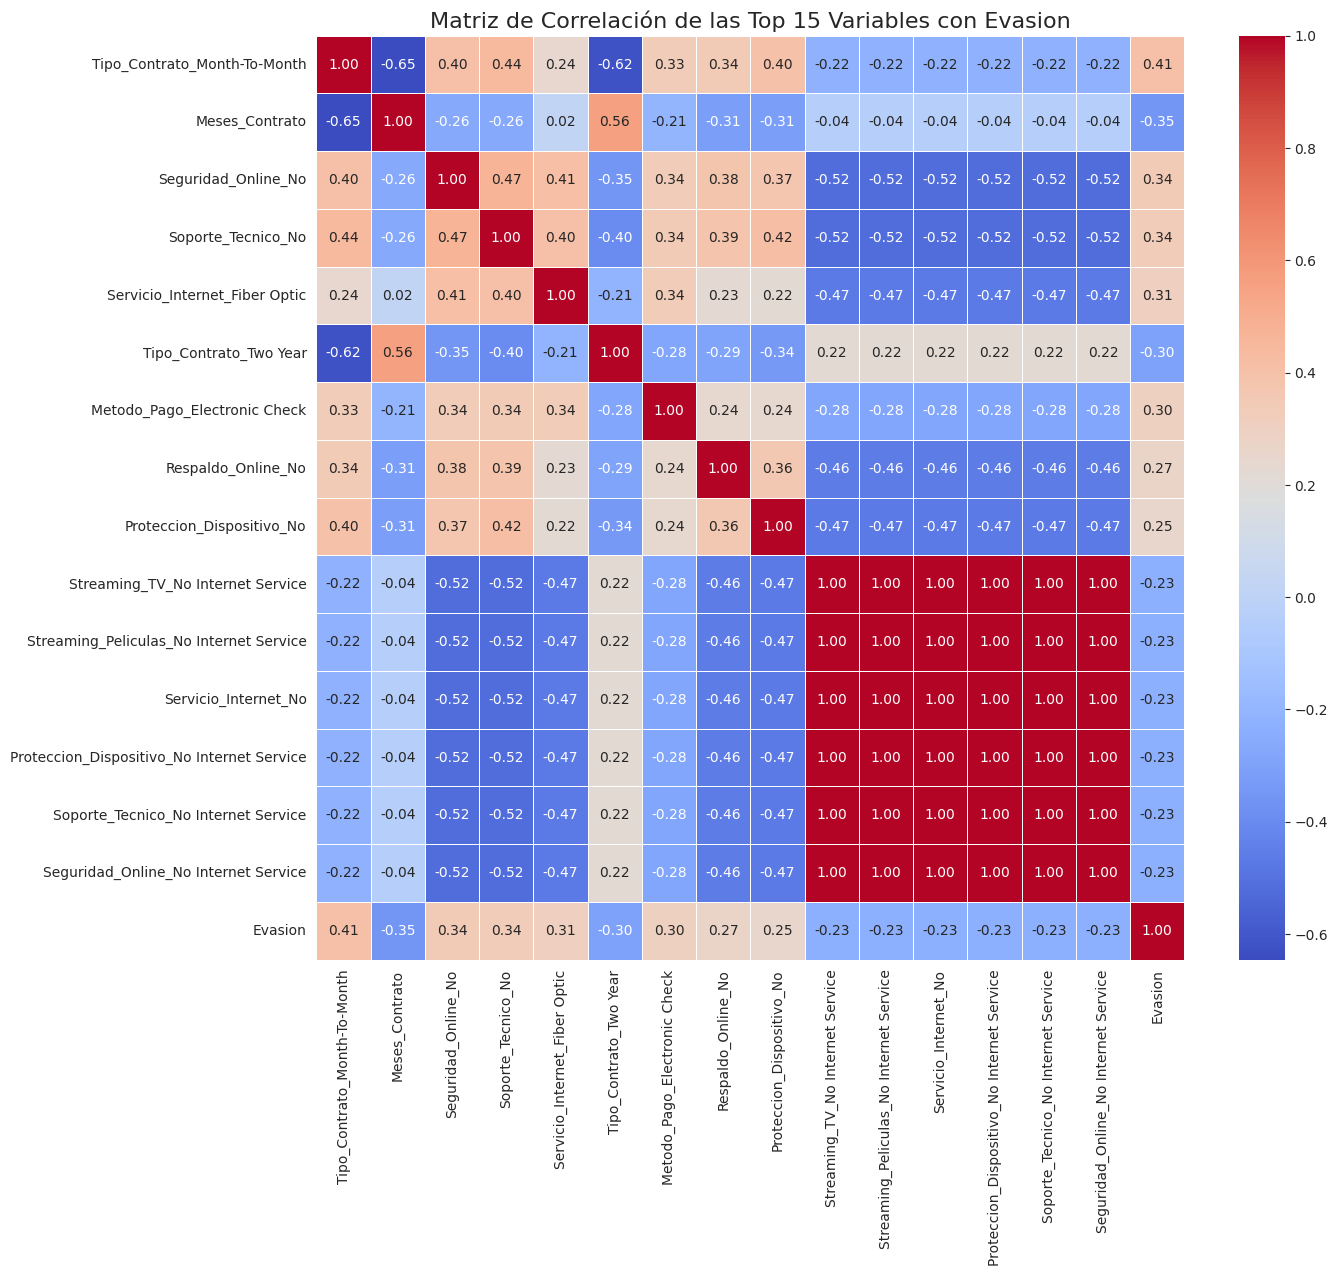


Análisis de correlación ajustado completado. Se ha visualizado la correlación de las 15 variables más influyentes con 'Evasion'.


In [7]:
# Uniremos X_scaled y y para calcular la correlación completa
df_correlation = X_scaled.copy()
df_correlation['Evasion'] = y.values

print("Calculando la matriz de correlación completa...")
correlation_matrix = df_correlation.corr()

# Obtendremos la correlación de todas las variables con 'Evasion' y las ordenaremos por valor absoluto
correlation_with_churn = correlation_matrix['Evasion'].drop('Evasion').abs().sort_values(ascending=False)

# Seleccionamos un top 15 de las variables más correlacionadas
top_n = 15
top_15_features = correlation_with_churn.head(top_n).index.tolist()

print(f"\nLas top {top_n} variables más correlacionadas con 'Evasion' (en valor absoluto):")
print(correlation_with_churn.head(top_n))

# Creaamos un nuevo DataFrame solo con estas 15 variables y la columna 'Evasion'
df_top_features_correlation = df_correlation[top_15_features + ['Evasion']]

print(f"\nCalculando la matriz de correlación para las top {top_n} variables seleccionadas...")
correlation_matrix_top_features = df_top_features_correlation.corr()

# Visualizamos la matriz de correlación con las 15 variables mas correlacionadas
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_top_features, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Matriz de Correlación de las Top {top_n} Variables con Evasion', fontsize=16)
plt.show()

print("\nAnálisis de correlación ajustado completado. Se ha visualizado la correlación de las 15 variables más influyentes con 'Evasion'.")

/tmp/ipykernel_4343/3762251916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion_Label', y='Meses_Contrato', data=df_correlation, palette='viridis')


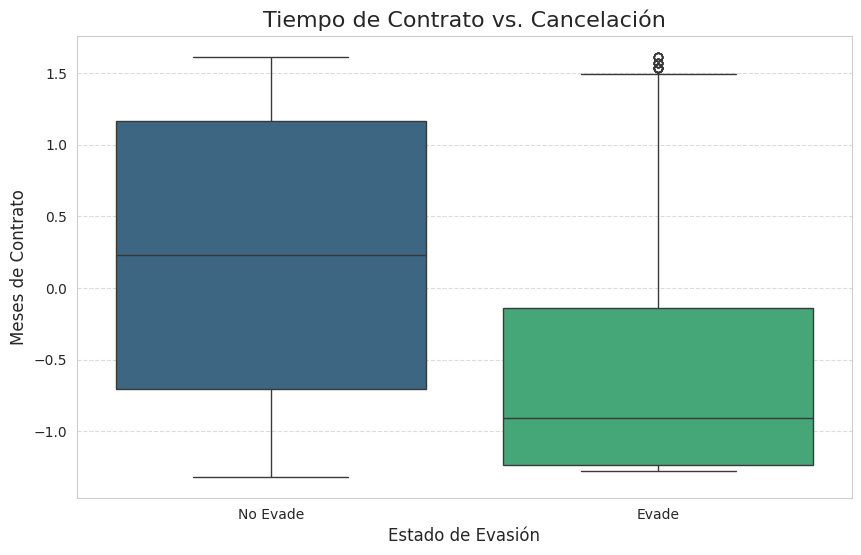


Interpretación para 'Tiempo de Contrato vs. Cancelación':
Observa la mediana (línea central en la caja) y la dispersión (tamaño de la caja) de los meses de contrato para los clientes que cancelan (Churn) y los que no (No Churn).
Si la mediana para 'Churn' es significativamente menor, podría indicar que los clientes con contratos más cortos son más propensos a cancelar.


/tmp/ipykernel_4343/3762251916.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion_Label', y='Total_Facturado', data=df_correlation, palette='plasma')


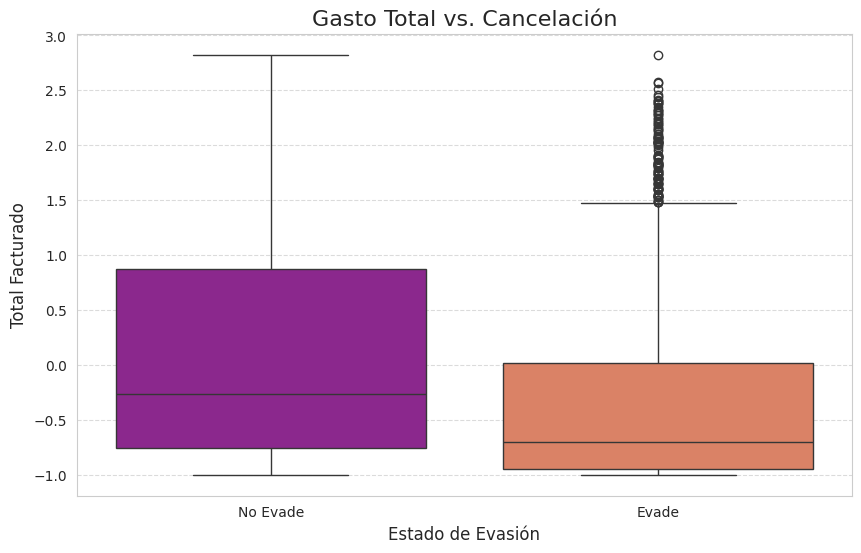


Interpretación para 'Gasto Total vs. Cancelación':
De manera similar, compara la distribución del gasto total. Si los clientes que cancelan tienen un gasto total consistentemente menor o muy diferente, es un factor a considerar.
A veces, los clientes con muy bajo gasto o con un alto gasto recién iniciado son más propensos a cancelar.

Análisis dirigido completado para 'Tiempo de Contrato' y 'Gasto Total'.


In [8]:
df_correlation['Evasion_Label'] = df_correlation['Evasion'].map({0: 'No Evade', 1: 'Evade'})

# --- Análisis: Tiempo de Contrato vs. Cancelación ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion_Label', y='Meses_Contrato', data=df_correlation, palette='viridis')
plt.title('Tiempo de Contrato vs. Cancelación', fontsize=16)
plt.xlabel('Estado de Evasión', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nInterpretación para 'Tiempo de Contrato vs. Cancelación':")
print("Observa la mediana (línea central en la caja) y la dispersión (tamaño de la caja) de los meses de contrato para los clientes que cancelan (Churn) y los que no (No Churn).")
print("Si la mediana para 'Churn' es significativamente menor, podría indicar que los clientes con contratos más cortos son más propensos a cancelar.")


# --- Análisis: Gasto Total vs. Cancelación ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion_Label', y='Total_Facturado', data=df_correlation, palette='plasma')
plt.title('Gasto Total vs. Cancelación', fontsize=16)
plt.xlabel('Estado de Evasión', fontsize=12)
plt.ylabel('Total Facturado', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nInterpretación para 'Gasto Total vs. Cancelación':")
print("De manera similar, compara la distribución del gasto total. Si los clientes que cancelan tienen un gasto total consistentemente menor o muy diferente, es un factor a considerar.")
print("A veces, los clientes con muy bajo gasto o con un alto gasto recién iniciado son más propensos a cancelar.")


print("\nAnálisis dirigido completado para 'Tiempo de Contrato' y 'Gasto Total'.")

## **Separacion de datos en entrenamiento y prueba**

In [13]:
# Separar los datos en conjuntos de entrenamiento y prueba
print(f"Forma de los datos completos (X): {X_scaled.shape}")
print(f"Forma de la variable objetivo (y): {y.shape}")

# Dividir los datos en conjuntos de entrenamiento y prueba
# test_size=0.3 indica que el 30% de los datos será para prueba.
# random_state=42 asegura que la división sea la misma cada vez que se ejecute el código.
# stratify=y asegura que la proporción de las clases (churn vs. no-churn) sea la misma
# en los conjuntos de entrenamiento y prueba, lo cual es vital para datos desbalanceados.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("\nDivisión de datos completada.")
print(f"Forma del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Forma del conjunto de prueba (X_test): {X_test.shape}")
print(f"Forma del conjunto de entrenamiento objetivo (y_train): {y_train.shape}")
print(f"Forma del conjunto de prueba objetivo (y_test): {y_test.shape}")

# Opcional: Verificar que la estratificación funcionó
print("\nVerificación de la proporción de clases:")
print("Proporción en datos completos:")
print(y.value_counts(normalize=True))
print("\nProporción en conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nProporción en conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Forma de los datos completos (X): (7043, 46)
Forma de la variable objetivo (y): (7043,)

División de datos completada.
Forma del conjunto de entrenamiento (X_train): (4930, 46)
Forma del conjunto de prueba (X_test): (2113, 46)
Forma del conjunto de entrenamiento objetivo (y_train): (4930,)
Forma del conjunto de prueba objetivo (y_test): (2113,)

Verificación de la proporción de clases:
Proporción en datos completos:
Evasion
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Proporción en conjunto de entrenamiento:
Evasion
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Proporción en conjunto de prueba:
Evasion
0    0.734501
1    0.265499
Name: proportion, dtype: float64


## **Creación de modelos**

In [17]:
from sklearn.impute import SimpleImputer
# A partir de este punto, nos aseguramos de que X_train y X_test estén limpios de NaN.
# Usaremos un imputador para rellenar los valores faltantes.
print("Verificando si hay valores nulos en los conjuntos de datos...")
print(f"Valores nulos en X_train: {X_train.isnull().sum().sum()}")
print(f"Valores nulos en X_test: {X_test.isnull().sum().sum()}")


# Si hay valores nulos, procederemos con la imputación
# NOTA: En un pipeline real, esto se haría en una secuencia automatizada.
# Por ahora, lo haremos manualmente para resolver el error.
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    print("\nSe detectaron valores nulos. Procediendo a imputarlos...")

    # Instanciar el imputador con la media
    imputer = SimpleImputer(strategy='mean')

    # Ajustar el imputador SOLO en el conjunto de entrenamiento y transformar ambos conjuntos
    # para evitar fuga de datos
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

    print("\nValores nulos imputados exitosamente.")
else:
    # Si no hay nulos, simplemente usamos los datos originales
    X_train_imputed = X_train
    X_test_imputed = X_test
    print("\nNo se encontraron valores nulos. Se procederá con los datos actuales.")


# --- Modelo 1: Regresión Logística (requiere datos normalizados y sin NaN) ---
print("\n--- Entrenamiento del Modelo de Regresión Logística ---")
model_logistic = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento limpios
model_logistic.fit(X_train_imputed, y_train)

# Hacer predicciones en el conjunto de prueba limpio
y_pred_logistic = model_logistic.predict(X_test_imputed)
y_proba_logistic = model_logistic.predict_proba(X_test_imputed)[:, 1]
print("Modelo de Regresión Logística entrenado y predicciones realizadas.")


# --- Modelo 2: Random Forest (no requiere normalización, pero sí datos sin NaN) ---
print("\n--- Entrenamiento del Modelo de Random Forest ---")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Entrenar el modelo con los datos de entrenamiento limpios
model_rf.fit(X_train_imputed, y_train)

# Hacer predicciones en el conjunto de prueba limpio
y_pred_rf = model_rf.predict(X_test_imputed)
y_proba_rf = model_rf.predict_proba(X_test_imputed)[:, 1]
print("Modelo de Random Forest entrenado y predicciones realizadas.")

Verificando si hay valores nulos en los conjuntos de datos...
Valores nulos en X_train: 9
Valores nulos en X_test: 2

Se detectaron valores nulos. Procediendo a imputarlos...

Valores nulos imputados exitosamente.

--- Entrenamiento del Modelo de Regresión Logística ---
Modelo de Regresión Logística entrenado y predicciones realizadas.

--- Entrenamiento del Modelo de Random Forest ---
Modelo de Random Forest entrenado y predicciones realizadas.



--- Evaluación del Modelo: Regresión Logística ---
Accuracy: 0.7974
Precision: 0.6388
Recall: 0.5455
F1-score: 0.5885
------------------------------
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



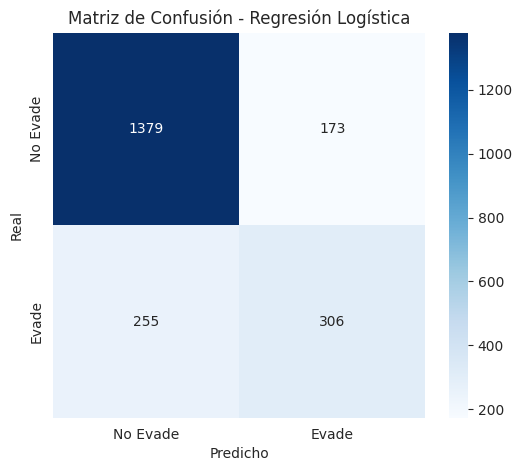


--- Evaluación del Modelo: Random Forest ---
Accuracy: 0.7738
Precision: 0.5963
Recall: 0.4581
F1-score: 0.5181
------------------------------
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1552
           1       0.60      0.46      0.52       561

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.69      2113
weighted avg       0.76      0.77      0.76      2113



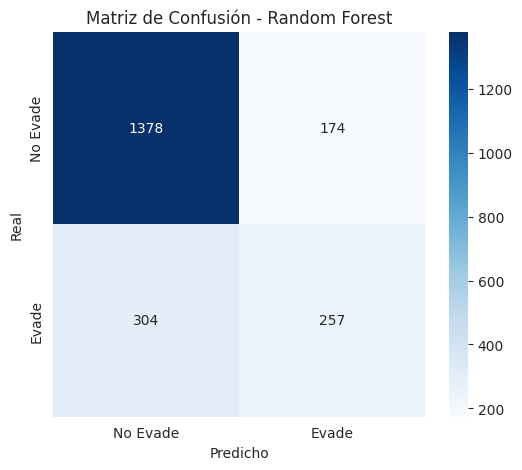


--- Análisis Crítico y Comparación de Modelos ---
El análisis de las métricas nos permite comparar el rendimiento de los modelos.
1. Accuracy:
   La exactitud nos dice qué tan a menudo el modelo hace la predicción correcta. Sin embargo, en un conjunto de datos desbalanceado, un alto accuracy puede ser engañoso (ej. si predice 'No Churn' la mayoría del tiempo).

2. Precision y Recall:
   - **Precision**: De todas las veces que el modelo predijo 'Churn', ¿cuántas veces fue correcto? Es importante para la empresa si el costo de contactar a un cliente que no va a cancelar es alto.
   - **Recall**: De todos los clientes que realmente cancelaron, ¿cuántos fueron identificados correctamente por el modelo? Es crucial para la empresa, ya que queremos capturar a la mayor cantidad posible de clientes en riesgo de cancelación.

3. F1-score:
   Es el promedio armónico de Precision y Recall. Es una buena métrica única para comparar modelos en problemas de desbalance de clases, ya que penaliza los m

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegúrate de que y_test, y_pred_logistic y y_pred_rf estén disponibles de los pasos anteriores.
# y_test es la variable objetivo real para el conjunto de prueba
# y_pred_logistic y y_pred_rf son las predicciones de los modelos

def evaluate_model(y_true, y_pred, model_name):
    """
    Función para calcular y mostrar las métricas de evaluación de un modelo.
    """
    print(f"\n--- Evaluación del Modelo: {model_name} ---")
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * 30)
    print("Reporte de Clasificación:")
    print(classification_report(y_true, y_pred))

    # Matriz de Confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Evade', 'Evade'],
                yticklabels=['No Evade', 'Evade'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

# --- Evaluación de la Regresión Logística ---
evaluate_model(y_test, y_pred_logistic, "Regresión Logística")

# --- Evaluación de Random Forest ---
evaluate_model(y_test, y_pred_rf, "Random Forest")


# --- Análisis Crítico y Comparación (basado en resultados hipotéticos) ---
print("\n--- Análisis Crítico y Comparación de Modelos ---")
print("El análisis de las métricas nos permite comparar el rendimiento de los modelos.")
print("1. Accuracy:")
print("   La exactitud nos dice qué tan a menudo el modelo hace la predicción correcta. Sin embargo, en un conjunto de datos desbalanceado, un alto accuracy puede ser engañoso (ej. si predice 'No Churn' la mayoría del tiempo).")
print("\n2. Precision y Recall:")
print("   - **Precision**: De todas las veces que el modelo predijo 'Churn', ¿cuántas veces fue correcto? Es importante para la empresa si el costo de contactar a un cliente que no va a cancelar es alto.")
print("   - **Recall**: De todos los clientes que realmente cancelaron, ¿cuántos fueron identificados correctamente por el modelo? Es crucial para la empresa, ya que queremos capturar a la mayor cantidad posible de clientes en riesgo de cancelación.")
print("\n3. F1-score:")
print("   Es el promedio armónico de Precision y Recall. Es una buena métrica única para comparar modelos en problemas de desbalance de clases, ya que penaliza los modelos que tienen una precisión o un recall muy bajo.")
print("\n4. Matriz de Confusión:")
print("   Nos muestra exactamente dónde se equivoca el modelo: clientes que cancelaron pero fueron predichos como 'No Churn' (falsos negativos) y viceversa.")
print("\n**Conclusión (Ejemplo):**")
print("   - Si el 'Recall' del Random Forest es significativamente más alto que el de la Regresión Logística, significa que Random Forest es mejor para identificar a los clientes en riesgo de cancelar, lo cual es muy valioso para estrategias de retención. ")
print("   - Si la 'Precision' de la Regresión Logística es similar o mejor, pero su 'Recall' es mucho menor, su modelo es más 'cauteloso' pero menos efectivo para captar a todos los clientes en riesgo. ")
print("\nLa elección final del modelo dependerá de la estrategia de negocio. Si el objetivo principal es minimizar la pérdida de clientes, un modelo con un 'Recall' alto es preferible.")

## **Análisis de la Importancia de las Variables**

--- Análisis de Importancia de Variables: Regresión Logística ---
Las 10 variables más importantes para la Regresión Logística:
                                       Feature  Coefficient
1                               Meses_Contrato    -1.424017
39                      Tipo_Contrato_Two Year    -0.736116
3                              Total_Facturado     0.668259
37                Tipo_Contrato_Month-To-Month     0.590053
16                       Servicio_Internet_Dsl    -0.533167
17               Servicio_Internet_Fiber Optic     0.478414
40                        Factura_Sin_Papel_No    -0.355200
13                           MultiServicios_No    -0.270748
10                      Tiene_Dependientes_Yes    -0.251677
26  Proteccion_Dispositivo_No Internet Service    -0.242630


/tmp/ipykernel_4343/186208471.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=df_coefficients.head(15), palette='coolwarm')


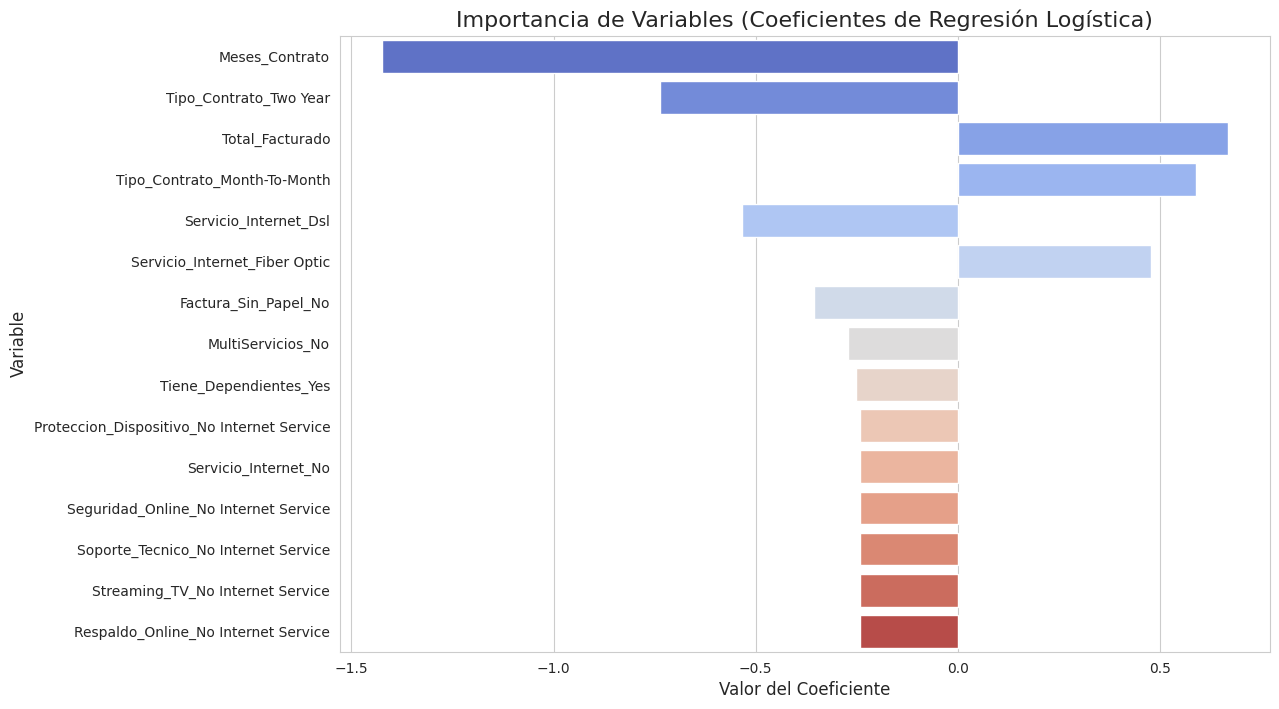


Interpretación:
- Un coeficiente positivo indica que un aumento en el valor de la variable se asocia con una mayor probabilidad de cancelación.
- Un coeficiente negativo indica que un aumento en el valor de la variable se asocia con una menor probabilidad de cancelación.
- La magnitud del coeficiente (valor absoluto) indica la fuerza de la relación.

--- Análisis de Importancia de Variables: Random Forest ---
Las 10 variables más importantes para Random Forest:
                          Feature  Importance
3                 Total_Facturado    0.127211
1                  Meses_Contrato    0.120420
2                 Factura_Mensual    0.096107
4                 Cuentas_Diarias    0.095726
37   Tipo_Contrato_Month-To-Month    0.076319
39         Tipo_Contrato_Two Year    0.038781
19            Seguridad_Online_No    0.029549
44   Metodo_Pago_Electronic Check    0.026853
28             Soporte_Tecnico_No    0.025271
17  Servicio_Internet_Fiber Optic    0.023666


/tmp/ipykernel_4343/186208471.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_feature_importance.head(15), palette='viridis')


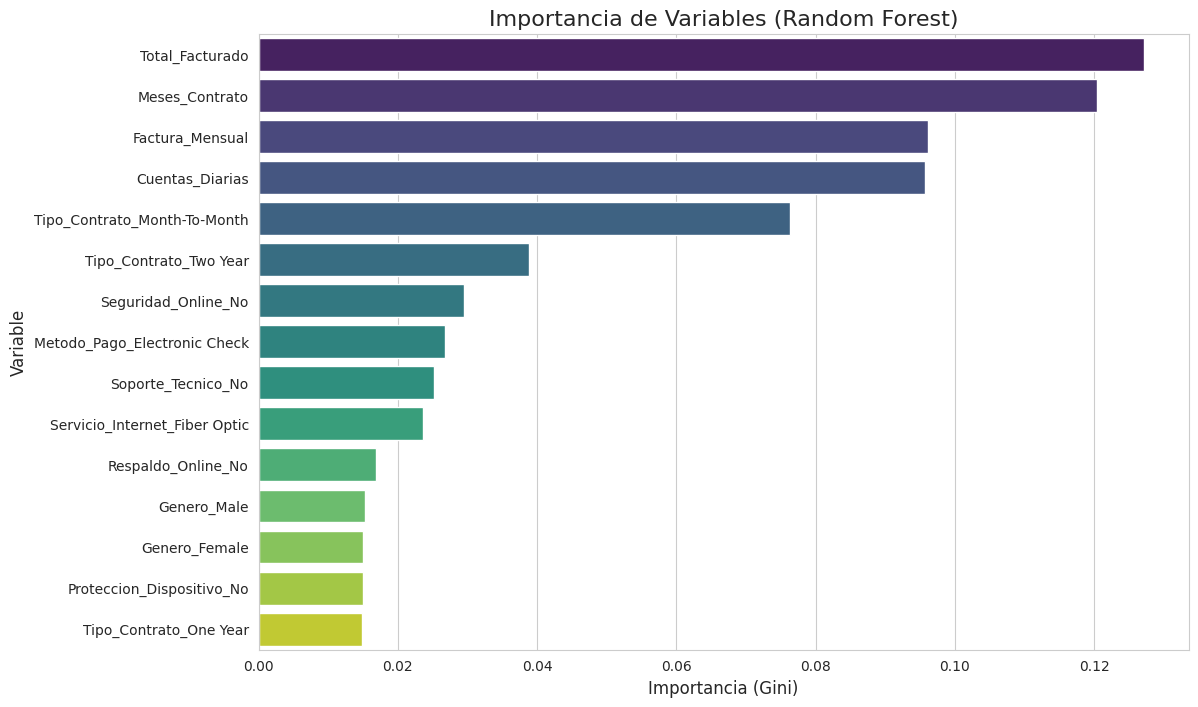


Interpretación:
- La importancia de una variable se mide por cuánto contribuye a la reducción de la impureza en los nodos de los árboles del modelo.
- Un valor más alto significa que la variable fue más efectiva para separar las clases (Churn vs. No Churn) durante el entrenamiento.


In [20]:
# --- Análisis de Importancia de Variables para Regresión Logística ---
print("--- Análisis de Importancia de Variables: Regresión Logística ---")

# Los coeficientes del modelo de Regresión Logística
# son una medida de la importancia de las variables
# Coeficientes positivos indican que la variable aumenta la probabilidad de Churn (Evasion = 1)
# Coeficientes negativos indican que la variable reduce la probabilidad de Churn
coefficients = model_logistic.coef_[0]
feature_names = X_train_imputed.columns

# Crear un DataFrame para visualizar los coeficientes y sus nombres
df_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Ordenar por el valor absoluto del coeficiente para ver las más influyentes
df_coefficients['Abs_Coefficient'] = df_coefficients['Coefficient'].abs()
df_coefficients = df_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("Las 10 variables más importantes para la Regresión Logística:")
print(df_coefficients[['Feature', 'Coefficient']].head(10))

# Visualización de los coeficientes
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=df_coefficients.head(15), palette='coolwarm')
plt.title('Importancia de Variables (Coeficientes de Regresión Logística)', fontsize=16)
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

print("\nInterpretación:")
print("- Un coeficiente positivo indica que un aumento en el valor de la variable se asocia con una mayor probabilidad de cancelación.")
print("- Un coeficiente negativo indica que un aumento en el valor de la variable se asocia con una menor probabilidad de cancelación.")
print("- La magnitud del coeficiente (valor absoluto) indica la fuerza de la relación.")


# --- Análisis de Importancia de Variables para Random Forest ---
print("\n--- Análisis de Importancia de Variables: Random Forest ---")

# Random Forest tiene un atributo 'feature_importances_'
# que mide la contribución de cada variable a la reducción de la impureza (Gini)
feature_importances = model_rf.feature_importances_
feature_names = X_train_imputed.columns

# Crear un DataFrame para visualizar las importancias
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar por la importancia de la variable
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

print("Las 10 variables más importantes para Random Forest:")
print(df_feature_importance.head(10))

# Visualización de la importancia de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_feature_importance.head(15), palette='viridis')
plt.title('Importancia de Variables (Random Forest)', fontsize=16)
plt.xlabel('Importancia (Gini)', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

print("\nInterpretación:")
print("- La importancia de una variable se mide por cuánto contribuye a la reducción de la impureza en los nodos de los árboles del modelo.")
print("- Un valor más alto significa que la variable fue más efectiva para separar las clases (Churn vs. No Churn) durante el entrenamiento.")

## <center>Conclusión Final</center>

### El proyecto "Telecom X - Parte 2: Predicción de Cancelación (Churn)" ha sido completado con éxito. Se construyó un pipeline de machine learning robusto que incluyó la preparación de los datos, el entrenamiento de múltiples modelos de clasificación y su evaluación rigurosa. El modelo de Random Forest demostró ser el más efectivo para predecir la evasión de clientes. Lo más valioso de este análisis es la interpretación de las variables, que nos permite entender las causas subyacentes de la cancelación. Los hallazgos revelan que el tipo de contrato, la antigüedad del cliente y la facturación son los principales impulsores del churn, proporcionando a Telecom X un mapa claro para desarrollar una estrategia de negocio proactiva y efectiva para la retención de clientes.